## **0.Préambule**
### **Mot introductif**

Ce projet a été réalisé par nous, Quentin Commelin, Kevan Jaber et Marie Quétel, un petit groupe de trois étudiants en deuxième année du cycle ingénieur de l'ENSAE Paris, dans le cadre du cours de python pour la data science. \
Intéressés par les problématiques du sovereign advisory et alors que la note S&P de la France est en ce moment centrale dans le débat public, nous nous sommes penchés sur la question de la prédictibilité du taux de paiement des intérêts liés à la dette publique. \
Est-ce seulement possible de prédire cette variable macroéconomique en se basant sur indicateurs de développement économique et humain ? \
C'est ce que nous allons découvrir ci-dessous. \
Bonne lecture !

## **I. Récupération des données**
### **I.1. Récupération des données grâce à l'API de la Banque Mondiale**

In [4]:
import requests

# URL de l'API pour lister les indicateurs
api_url_indicators = "http://api.worldbank.org/v2/indicator?format=json&per_page=10000"

# Récupérer les indicateurs
response = requests.get(api_url_indicators)
if response.status_code == 200:
    indicators_data = response.json()[1]  # Le deuxième élément contient la liste des indicateurs
    print(f"Nombre total d'indicateurs disponibles : {len(indicators_data)}")
else:
    print(f"Erreur lors de la récupération des indicateurs : {response.status_code}")
    

/Users/kevanjaber/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Nombre total d'indicateurs disponibles : 10000


Il y a au total 10000 indicateurs disponibles grâce à l'API de la banque mondiale. Nous allons ensuite sélectionner quelques uns des indicateurs pertinents pour la modélisation.

In [5]:
import requests
import pandas as pd

# URL de l'API pour lister les indicateurs
api_url_indicators = "http://api.worldbank.org/v2/indicator?format=json&per_page=10000"

# Récupérer les indicateurs
response = requests.get(api_url_indicators)

# Vérifier la réponse
if response.status_code == 200:
    # Récupérer les données JSON (la liste des indicateurs est dans le deuxième élément)
    indicators_data = response.json()[1]
    
    # Convertir les données en DataFrame
    df_indicators = pd.DataFrame(indicators_data)
    
    # Afficher les premières lignes du DataFrame
    print(f"Nombre total d'indicateurs disponibles : {len(df_indicators)}")
    print(df_indicators)  # Afficher les 5 premières lignes du DataFrame
else:
    print(f"Erreur lors de la récupération des indicateurs : {response.status_code}")


Nombre total d'indicateurs disponibles : 10000
                        id                                             name  \
0       1.0.HCount.1.90usd                  Poverty Headcount ($1.90 a day)   
1        1.0.HCount.2.5usd                  Poverty Headcount ($2.50 a day)   
2     1.0.HCount.Mid10to50            Middle Class ($10-50 a day) Headcount   
3          1.0.HCount.Ofcl          Official Moderate Poverty Rate-National   
4      1.0.HCount.Poor4uds                     Poverty Headcount ($4 a day)   
...                    ...                                              ...   
9995        IT.MOB.INVS.CD    Mobile communication investment (current US$)   
9996        IT.MOB.INVS.CN    Mobile communication investment (current LCU)   
9997        IT.MOB.REVN.CD  Revenue from mobile communication (current US$)   
9998        IT.MOB.REVN.CN  Revenue from mobile communication (current LCU)   
9999           IT.NET.BBND                    Fixed broadband subscriptions   

    

Ci dessus un aperçu du tableau contenant toutes les données potentiellement utilisables.

### **1.2. Sélection des indicateurs pertinents**

In [6]:
# Sélection manuelle d'indicateurs pertinents
indicateurs_selectionnes = {
    "NY.GDP.PCAP.CD": "PIB par habitant (en dollars US courants)",
    "EG.ELC.ACCS.ZS": "Pourcentage de la population ayant accès à l'électricité",
    "SP.DYN.IMRT.IN": "Taux de mortalité infantile (pour 1 000 naissances vivantes)",
    "SE.ADT.LITR.ZS": "Taux d'alphabétisation chez les adultes",
    "FP.CPI.TOTL.ZG" : "Inflation sur les produits de consommation",
    "DT.NFL.BOND.CD" : "Investissements nationaux dans les obligations",
    "IQ.CPA.ENVR.XQ" : "Note",
    "IQ.CPA.ENVR.XQ" : "CPIA pour les institutions et politiques environnementales",
    "FR.INR.RISK" : "Prime de risque sur les prêts",
    "TM.TAX.MANF.BR.ZS" : "Droits de douane sur les produits manufacturés",
    "TM.TAX.TCOM.BR.ZS" : "Droits de douane sur les matières premières",
    "IQ.CPA.MACR.XQ" : "CPIA pour la gestion macroéconomique",
    "IQ.CPA.FINQ.XQ" : "CPIA pour la gestion du budget et des finances",
    "IQ.CPA.PADM.XQ" : "CPIA sur la qualité de l'administration publique",
    "IQ.CPA.PROT.XQ" : "CPIA sur la protection sociale",
    "IQ.CPA.TRAN.XQ" : "CPIA sur la transparence, responsabilité et corruption dans le secteur public",
    "FR.INR.DPST" : "Taux d'intérêt sur les dépôts",
    "NE.EXP.GNFS.KD.ZG" : "Croissance annuelle des exportations de biens et services",
    "NE.IMP.GNFS.KD.ZG" : "Croissance annuelle des exportations de biens et services",
    "NV.IND.TOTL.KD.ZG" : "Croissance annuelle de la valeur ajoutée de l'industrie",
    "NY.ADJ.DRES.GN.ZS" : "Épuisement des forêts, des sources d'énergie, des minéraux",
    "NY.ADJ.NNAT.CD" : "Épargne nationale nette",
    "BN.CAB.XOKA.GD.ZS" : "Balance des paiements",
    "NE.EXP.GNFS.ZS" : "Exportation de biens et services pour 100 de PIB",
    "BX.KLT.DINV.WD.GD.ZS" : "Entrées nettes d'IDE, pour 100 de PIB",
    "BM.KLT.DINV.WD.GD.ZS" : "Sorties nettes d'IDE, pour 100 de PIB",
    "FR.INR.LNDP": "Spread de taux d'intérêt",
    "GC.XPN.INTP.RV.ZS" : "Taux de paiement des intérêts (pour 100 de PIB)"
}

# Afficher les indicateurs sélectionnés
print("Indicateurs sélectionnés pour l'analyse :")
for code, description in indicateurs_selectionnes.items():
    print(f"{code} : {description}")

Indicateurs sélectionnés pour l'analyse :
NY.GDP.PCAP.CD : PIB par habitant (en dollars US courants)
EG.ELC.ACCS.ZS : Pourcentage de la population ayant accès à l'électricité
SP.DYN.IMRT.IN : Taux de mortalité infantile (pour 1 000 naissances vivantes)
SE.ADT.LITR.ZS : Taux d'alphabétisation chez les adultes
FP.CPI.TOTL.ZG : Inflation sur les produits de consommation
DT.NFL.BOND.CD : Investissements nationaux dans les obligations
IQ.CPA.ENVR.XQ : CPIA pour les institutions et politiques environnementales
FR.INR.RISK : Prime de risque sur les prêts
TM.TAX.MANF.BR.ZS : Droits de douane sur les produits manufacturés
TM.TAX.TCOM.BR.ZS : Droits de douane sur les matières premières
IQ.CPA.MACR.XQ : CPIA pour la gestion macroéconomique
IQ.CPA.FINQ.XQ : CPIA pour la gestion du budget et des finances
IQ.CPA.PADM.XQ : CPIA sur la qualité de l'administration publique
IQ.CPA.PROT.XQ : CPIA sur la protection sociale
IQ.CPA.TRAN.XQ : CPIA sur la transparence, responsabilité et corruption dans le sec

In [7]:
import requests
import pandas as pd

# Liste des indicateurs sélectionnés
indicateurs_selectionnes = {
    "NY.GDP.PCAP.CD": "PIB par habitant (en dollars US courants)",
    "EG.ELC.ACCS.ZS": "Pourcentage de la population ayant accès à l'électricité",
    "SP.DYN.IMRT.IN": "Taux de mortalité infantile (pour 1 000 naissances vivantes)",
    "SE.ADT.LITR.ZS": "Taux d'alphabétisation chez les adultes",
    "FP.CPI.TOTL.ZG" : "Inflation sur les produits de consommation",
    "NY.GDP.MKTP.KD.ZG" : "Taux de croissance du PIB",
    "DT.NFL.BOND.CD" : "Investissements nationaux dans les obligations",
    "IQ.CPA.ENVR.XQ" : "CPIA pour les institutions et politiques environnementales",
    "FR.INR.RISK" : "Prime de risque sur les prêts",
    "TM.TAX.MANF.BR.ZS" : "Droits de douane sur les produits manufacturés",
    "TM.TAX.TCOM.BR.ZS" : "Droits de douane sur les matières premières",
    "IQ.CPA.MACR.XQ" : "CPIA pour la gestion macroéconomique",
    "IQ.CPA.FINQ.XQ" : "CPIA pour la gestion du budget et des finances",
    "IQ.CPA.PADM.XQ" : "CPIA sur la qualité de l'administration publique",
    "IQ.CPA.PROT.XQ" : "CPIA sur la protection sociale",
    "IQ.CPA.TRAN.XQ" : "CPIA sur la transparence, responsabilité et corruption dans le secteur public",
    "FR.INR.DPST" : "Taux d'intérêt sur les dépôts",
    "NE.EXP.GNFS.KD.ZG" : "Croissance annuelle des exportations de biens et services",
    "NE.IMP.GNFS.KD.ZG" : "Croissance annuelle des exportations de biens et services",
    "NV.IND.TOTL.KD.ZG" : "Croissance annuelle de la valeur ajoutée de l'industrie",
    "NY.ADJ.DRES.GN.ZS" : "Épuisement des forêts, des sources d'énergie, des minéraux",
    "NY.ADJ.NNAT.CD" : "Épargne nationale nette",
    "BN.CAB.XOKA.GD.ZS" : "Balance des paiements",
    "NE.EXP.GNFS.ZS" : "Exportation de biens et services pour 100 de PIB",
    "BX.KLT.DINV.WD.GD.ZS" : "Entrées nettes d'IDE, pour 100 de PIB",
    "BM.KLT.DINV.WD.GD.ZS" : "Sorties nettes d'IDE, pour 100 de PIB",
    "FR.INR.LNDP": "Spread de taux d'intérêt",
    "GC.XPN.INTP.RV.ZS" : "Taux de paiement des intérêts (pour 100 de PIB)"
    
}

# Période pour laquelle récupérer les données
annee_debut = 2010
annee_fin = 2023

# Initialiser un DataFrame vide pour stocker toutes les données
data_combined = pd.DataFrame()

# Récupérer les données pour chaque indicateur
for code, description in indicateurs_selectionnes.items():
    print(f"Récupération des données pour l'indicateur : {description}")
    
    # Construire l'URL de requête pour l'indicateur
    api_url = f"http://api.worldbank.org/v2/country/all/indicator/{code}?date={annee_debut}:{annee_fin}&format=json&per_page=20000"
    response = requests.get(api_url)
    
    if response.status_code == 200:
        json_data = response.json()
        
        # Vérifier si le contenu contient des données
        if len(json_data) > 1 and isinstance(json_data[1], list):
            data = json_data[1]  # Les données se trouvent dans le deuxième élément du JSON
            
            # Convertir les données en DataFrame
            df = pd.json_normalize(data)
            
            # Ajouter l'indicateur au DataFrame
            df["indicator_code"] = code
            df["indicator_name"] = description
            
            # Garder uniquement les colonnes pertinentes
            df = df[["country.id", "country.value", "date", "value", "indicator_code", "indicator_name"]]
            
            # Renommer les colonnes pour plus de clarté
            df.columns = ["Country Code", "Country Name", "Year", "Value", "Indicator Code", "Indicator Name"]
            
            # Ajouter les données au DataFrame combiné
            data_combined = pd.concat([data_combined, df], ignore_index=True)
            print(f"Succès : Données récupérées pour l'indicateur {description}.")
        else:
            print(f"Pas de données disponibles pour l'indicateur {description}.")
    else:
        print(f"Erreur lors de la récupération des données pour l'indicateur {description} (Code {code}).")

print("Récupération des données terminée.")

Récupération des données pour l'indicateur : PIB par habitant (en dollars US courants)
Succès : Données récupérées pour l'indicateur PIB par habitant (en dollars US courants).
Récupération des données pour l'indicateur : Pourcentage de la population ayant accès à l'électricité
Succès : Données récupérées pour l'indicateur Pourcentage de la population ayant accès à l'électricité.
Récupération des données pour l'indicateur : Taux de mortalité infantile (pour 1 000 naissances vivantes)
Succès : Données récupérées pour l'indicateur Taux de mortalité infantile (pour 1 000 naissances vivantes).
Récupération des données pour l'indicateur : Taux d'alphabétisation chez les adultes
Succès : Données récupérées pour l'indicateur Taux d'alphabétisation chez les adultes.
Récupération des données pour l'indicateur : Inflation sur les produits de consommation
Succès : Données récupérées pour l'indicateur Inflation sur les produits de consommation.
Récupération des données pour l'indicateur : Taux de c

Nous avons sélectionné manuellement tous ces indicateurs, en veillant à ce qu'à chaque fois, la récupération des données soit possible. Si pour un indicateur, les données ne sont pas récupérables, le code renvoie que la récupération est impossible. 

### **1.3 : Classification des données** (pour une meilleure visualisation)

In [8]:
## On définit : 
## Le type 1 comme les variables de flux macroéconomiques
## Le type 2 comme les variables de stocks macroéconomiques
## Le type 3 comme les variables environnementales
## Le type 4 comme les variables CPIA (par souci d'échelle et d'identité de la manière de mesurer)
## Le type 5 comme les variables de développement humain
## Le type 6 comme les variables de taux relatives au commerce international
## Le type 7 comme les variables de taux relatives à la productio et à la consommation
## Le type 8 comme les variables de taux d'intérêts
## Le type 9 comme la variable à expliquer

typologie_des_indicateurs = {
    "Entrées nettes d'IDE, pour 100 de PIB": 1,
    "Sorties nettes d'IDE, pour 100 de PIB": 1,
    "PIB par habitant (en dollars US courants)": 2,
    "Investissements nationaux dans les obligations": 2,
    "Prime de risque sur les prêts": 2,
    "Épargne nationale nette": 2,
    "Balance des paiements": 2,
    "Épuisement des forêts, des sources d'énergie, des minéraux": 3,
    "CPIA pour les institutions et politiques environnementales": 4,
    "CPIA pour la gestion macroéconomique": 4,
    "CPIA pour la gestion du budget et des finances": 4,
    "CPIA sur la qualité de l'administration publique": 4,
    "CPIA sur la protection sociale": 4,
    "CPIA sur la transparence, responsabilité et corruption dans le secteur public": 4,
    "Pourcentage de la population ayant accès à l'électricité": 5,
    "Taux de mortalité infantile (pour 1 000 naissances vivantes)": 5,
    "Taux d'alphabétisation chez les adultes": 5,
    "Croissance annuelle des exportations de biens et services": 6,
    "Croissance annuelle des exportations de biens et services": 6,
    "Droits de douane sur les produits manufacturés": 6,
    "Droits de douane sur les matières premières": 6,
    "Exportation de biens et services pour 100 de PIB": 6,
    "Inflation sur les produits de consommation": 7,
    "Taux de croissance du PIB": 7,
    "Croissance annuelle de la valeur ajoutée de l'industrie": 7,
    "Spread de taux d'intérêt": 8,
    "Taux d'intérêt sur les dépôts": 8,
    "Taux de paiement des intérêts (pour 100 de PIB)": 9
}

## **II. Nettoyage des données**

In [9]:
# Nettoyage des données (correction des SettingWithCopyWarning)

# Supprimer les lignes avec des valeurs manquantes
data_cleaned = data_combined.dropna(subset=["Country Code", "Country Name", "Year", "Value"]).copy()

# Convertir les colonnes "Year" et "Value" en types numériques
data_cleaned.loc[:, "Year"] = pd.to_numeric(data_cleaned["Year"], errors="coerce")
data_cleaned.loc[:, "Value"] = pd.to_numeric(data_cleaned["Value"], errors="coerce")

# Afficher un aperçu des données nettoyées
print("Aperçu des données nettoyées :")
print(data_cleaned.head())

# Vérifier les dimensions après nettoyage
print(f"Dimensions avant nettoyage : {data_combined.shape}")
print(f"Dimensions après nettoyage : {data_cleaned.shape}")



Aperçu des données nettoyées :
  Country Code                 Country Name  Year        Value  \
0           ZH  Africa Eastern and Southern  2023  1659.515290   
1           ZH  Africa Eastern and Southern  2022  1628.024526   
2           ZH  Africa Eastern and Southern  2021  1522.590088   
3           ZH  Africa Eastern and Southern  2020  1344.080962   
4           ZH  Africa Eastern and Southern  2019  1493.780445   

   Indicator Code                             Indicator Name  
0  NY.GDP.PCAP.CD  PIB par habitant (en dollars US courants)  
1  NY.GDP.PCAP.CD  PIB par habitant (en dollars US courants)  
2  NY.GDP.PCAP.CD  PIB par habitant (en dollars US courants)  
3  NY.GDP.PCAP.CD  PIB par habitant (en dollars US courants)  
4  NY.GDP.PCAP.CD  PIB par habitant (en dollars US courants)  
Dimensions avant nettoyage : (104272, 6)
Dimensions après nettoyage : (64723, 6)


Nous avons maintenant besoin de compléter les cases du tableau dans lesquelles les données sont manquantes. On procède par interpolation linéaire.

In [10]:
# Restructurer les données pour mettre les indicateurs en colonnes
data_pivot = data_cleaned.pivot_table(
    index=["Country Code", "Country Name", "Year"], # Index par pays et année
    columns="Indicator Name", # Colonnes pour chaque indicateur
    values="Value" # Valeurs des indicateurs
).reset_index()

# Vérifier les données restructurées
print("Aperçu des données restructurées :")
print(data_pivot.head())

# Vérifier les données manquantes après restructuration
print("Données manquantes après restructuration :")
missing_after_pivot = data_pivot.isnull().sum()
print(missing_after_pivot)
print("Le nombre total de données manquantes est :", missing_after_pivot.sum())

# Interpolation par groupe de pays (sans affecter les indices)
for col in data_pivot.columns[3:]:  # Colonnes des indicateurs uniquement
    data_pivot[col] = data_pivot.groupby("Country Code")[col].transform(
        lambda x: x.interpolate(method="linear")
    )

# Remplir les valeurs restantes par la moyenne globale de chaque colonne
for col in data_pivot.columns[3:]:
    data_pivot[col].fillna(data_pivot[col].mean(), inplace=True)

# Vérifier les données manquantes après remplissage
missing_after_fill = data_pivot.isnull().sum()
print("Données manquantes après remplissage :")
print(missing_after_fill)
print("Le nombre total de données manquantes est maintenant", missing_after_fill.sum())


Aperçu des données restructurées :
Indicator Name Country Code Country Name  Year  Balance des paiements  \
0                        1A   Arab World  2010                    NaN   
1                        1A   Arab World  2011                    NaN   
2                        1A   Arab World  2012                    NaN   
3                        1A   Arab World  2013                    NaN   
4                        1A   Arab World  2014                    NaN   

Indicator Name  CPIA pour la gestion du budget et des finances  \
0                                                          2.7   
1                                                          2.8   
2                                                          2.7   
3                                                          2.7   
4                                                          2.7   

Indicator Name  CPIA pour la gestion macroéconomique  \
0                                                3.4   
1                

/var/folders/g2/s2_gszbx7z54150rd99f55600000gn/T/ipykernel_1258/4025659350.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_pivot[col].fillna(data_pivot[col].mean(), inplace=True)


## **III. Visualisation et analyse graphique**

### **3.1. Statistiques descriptives**

In [11]:
# Identifier les colonnes non numériques
non_numeric_columns = data_pivot.select_dtypes(exclude=["number"]).columns
print("Colonnes non numériques :")
print(non_numeric_columns)

# Filtrer les colonnes numériques
numeric_columns = data_pivot.select_dtypes(include=["number"]).columns
data_numeric = data_pivot[numeric_columns]

# Calcul des statistiques descriptives globales
descriptive_stats = data_numeric.describe().transpose()
print("Statistiques descriptives globales :")
print(descriptive_stats)

# Calcul des statistiques descriptives par année
stats_by_year = data_pivot.groupby("Year")[numeric_columns].mean()
print("Statistiques descriptives par année :")
print(stats_by_year)

Colonnes non numériques :
Index(['Country Code', 'Country Name'], dtype='object', name='Indicator Name')
Statistiques descriptives globales :
                                                     count          mean  \
Indicator Name                                                             
Year                                                3695.0  2.016474e+03   
Balance des paiements                               3695.0 -2.245307e+00   
CPIA pour la gestion du budget et des finances      3695.0  3.159612e+00   
CPIA pour la gestion macroéconomique                3695.0  3.522035e+00   
CPIA pour les institutions et politiques enviro...  3695.0  3.152765e+00   
CPIA sur la protection sociale                      3695.0  3.059134e+00   
CPIA sur la qualité de l'administration publique    3695.0  2.916873e+00   
CPIA sur la transparence, responsabilité et cor...  3695.0  2.888828e+00   
Croissance annuelle de la valeur ajoutée de l'i...  3695.0  2.886774e+00   
Croissance annuelle de

### **3.2. Liens entre les variables**

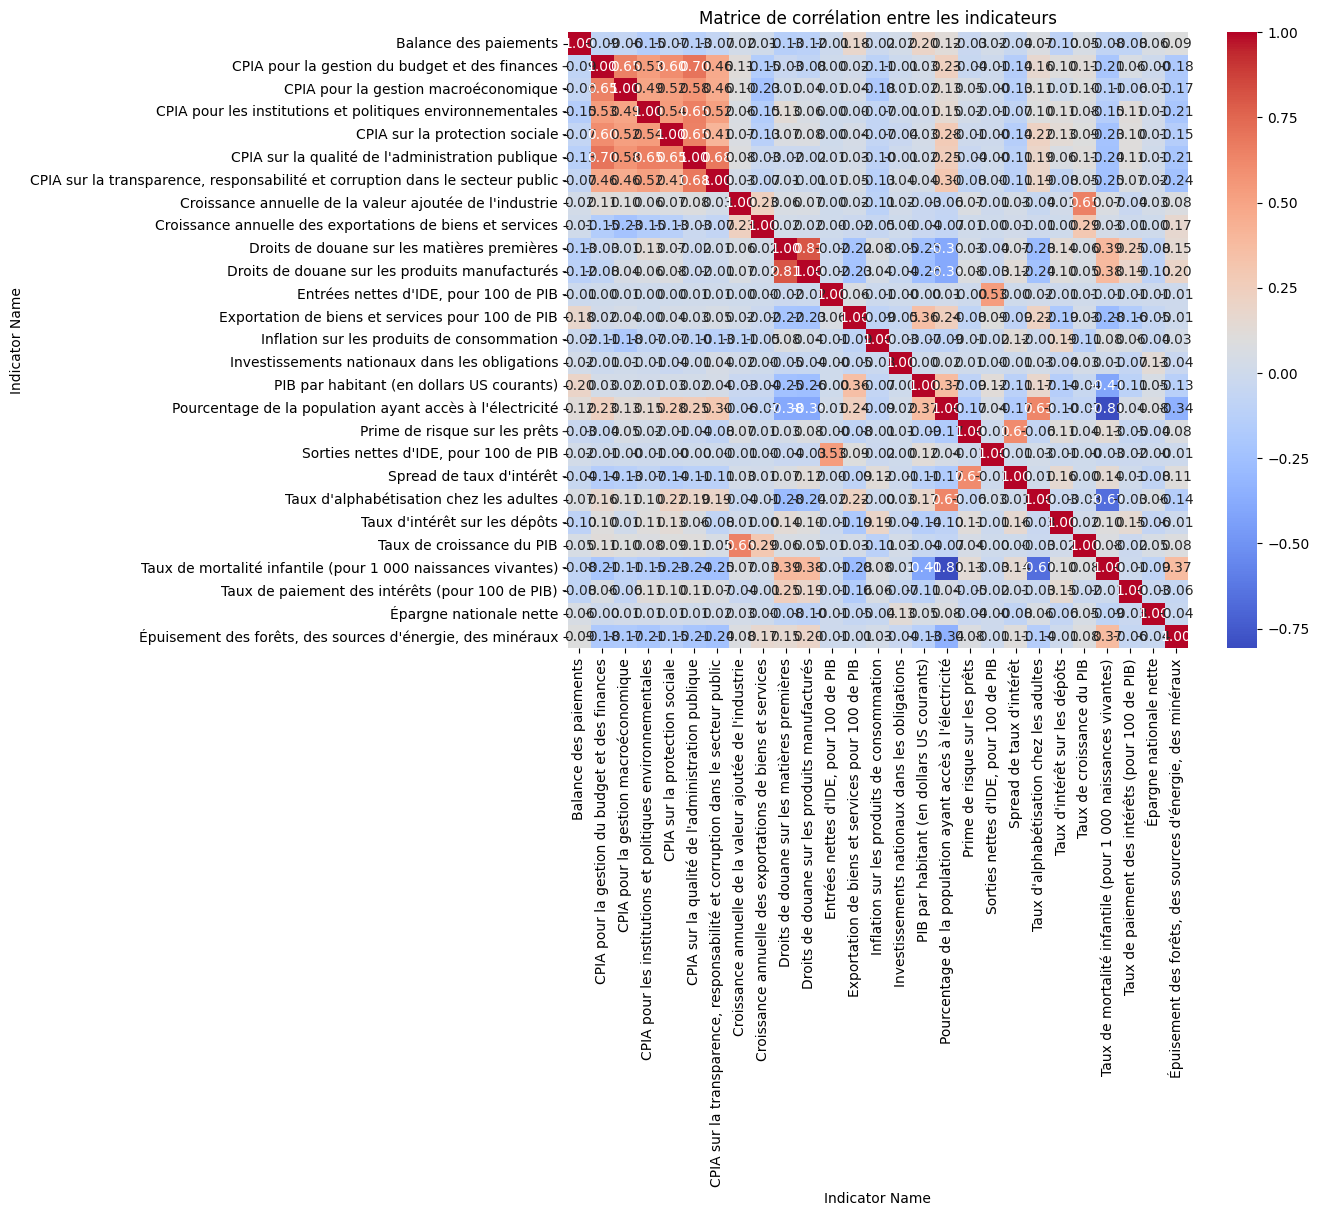

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation entre les indicateurs
indicator_columns = data_pivot.columns[3:]  # Indicateurs uniquement
correlation_matrix = data_pivot[indicator_columns].corr()

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre les indicateurs")
plt.show()

In [13]:
## Calcul de la corrélation moyenne entre deux variables 
import numpy as np
correlation_matrix_abs = correlation_matrix.abs()
somme_des_coeffs=correlation_matrix_abs.sum().sum()-len(correlation_matrix)
corr_coeff_moyen=somme_des_coeffs/(len(correlation_matrix)**2 - len(correlation_matrix))
print("Le coefficient de corrélation moyen entre deux variables est :", corr_coeff_moyen)

Le coefficient de corrélation moyen entre deux variables est : 0.1157481855647782


On remarque que le coefficient de corrélation moyen entre deux variables est relativement faible, ce qui assure que les variables choisies rendent bien compte de caractéristiques suffisamment différentes.

### **3.3. Évolution temporelle des indicateurs**

In [14]:
## Pour rappel, voici le tableau de données "data_pivot"
print(data_pivot)

Indicator Name Country Code Country Name  Year  Balance des paiements  \
0                        1A   Arab World  2010              -2.245307   
1                        1A   Arab World  2011              -2.245307   
2                        1A   Arab World  2012              -2.245307   
3                        1A   Arab World  2013              -2.245307   
4                        1A   Arab World  2014              -2.245307   
...                     ...          ...   ...                    ...   
3690                     ZW     Zimbabwe  2019               3.579179   
3691                     ZW     Zimbabwe  2020               4.080178   
3692                     ZW     Zimbabwe  2021               1.278300   
3693                     ZW     Zimbabwe  2022               0.930064   
3694                     ZW     Zimbabwe  2023               0.379995   

Indicator Name  CPIA pour la gestion du budget et des finances  \
0                                                        

On rappelle qu'on a défini : \
le type 1 comme les variables de flux macroéconomiques, \
le type 2 comme les variables de stocks macroéconomiques, \
le type 3 comme les variables environnementales, \
le type 4 comme les variables CPIA (par souci d'échelle), \
le type 5 comme les variables de développement humain, \
le type 6 comme les variables de taux relatives au commerce international, \
le type 7 comme les variables de taux relatives à la production et à la consommation, \
le type 8 comme les variables relatives aux taux d'intérêts, \
le type 9 comme la variable à expliquer, \
et que le dictionnaire associant chaque indicateur à un type s'appelle typologie_des_indicateurs.

La colonne 'Year' est valide et prête pour le regroupement.


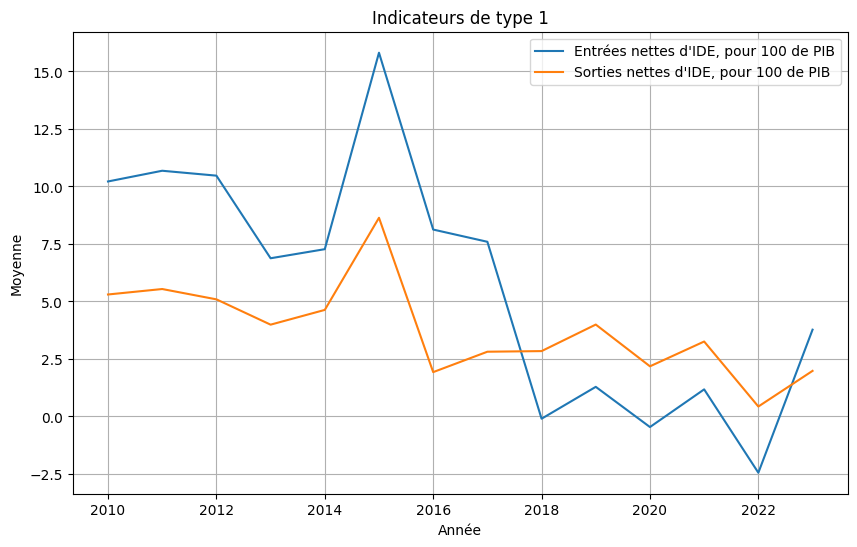

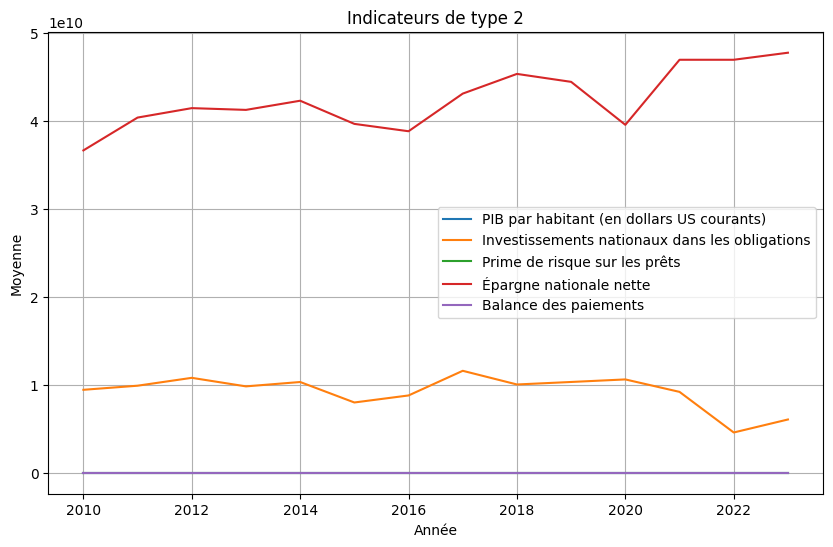

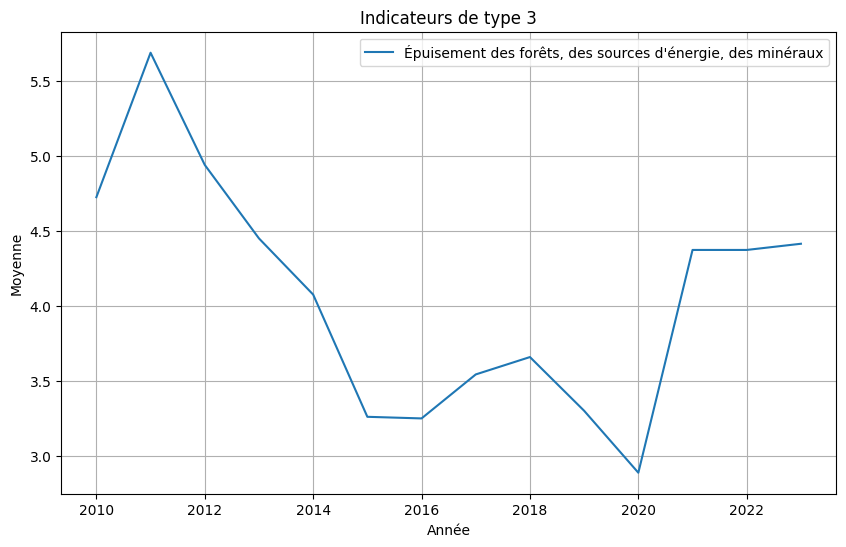

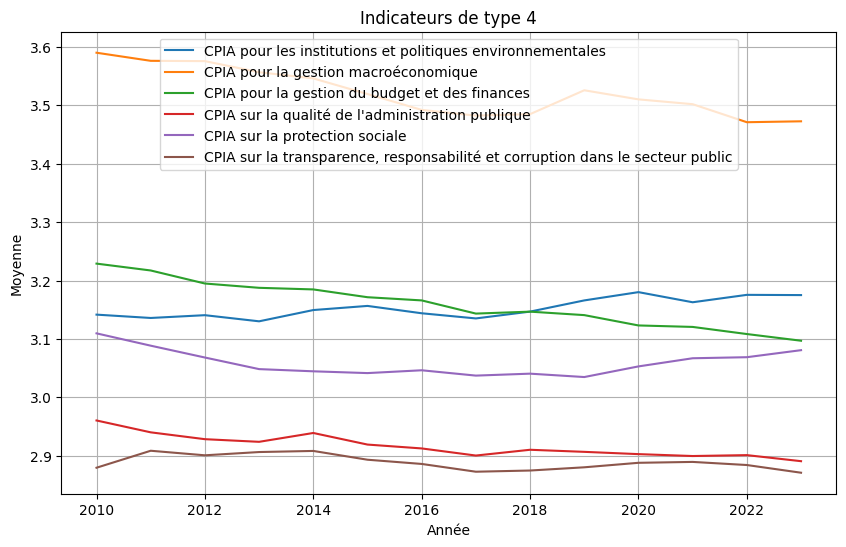

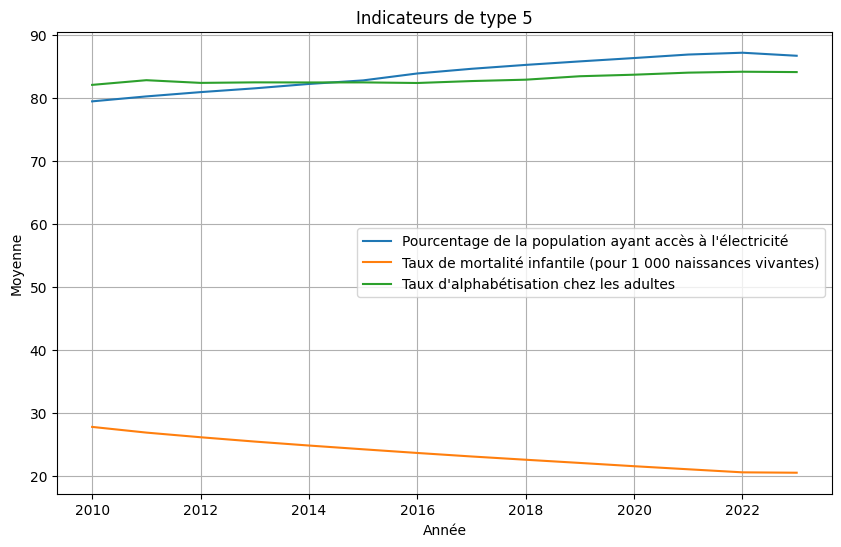

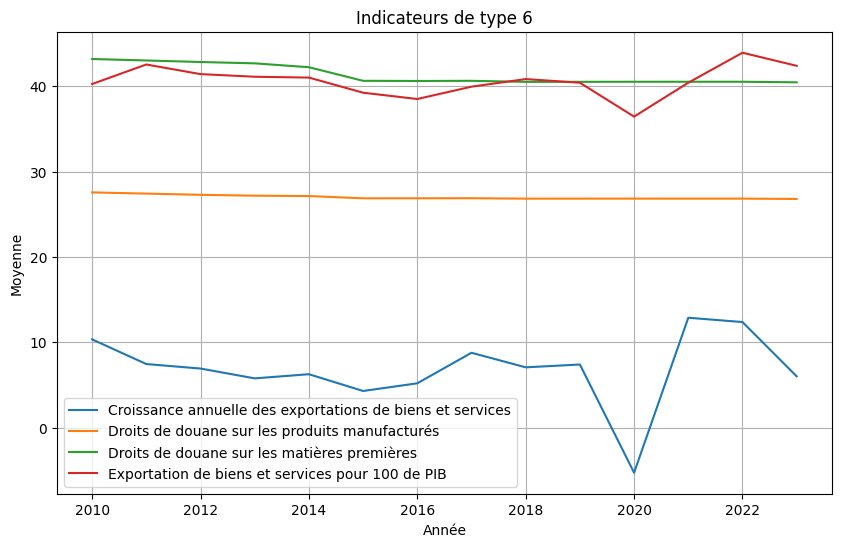

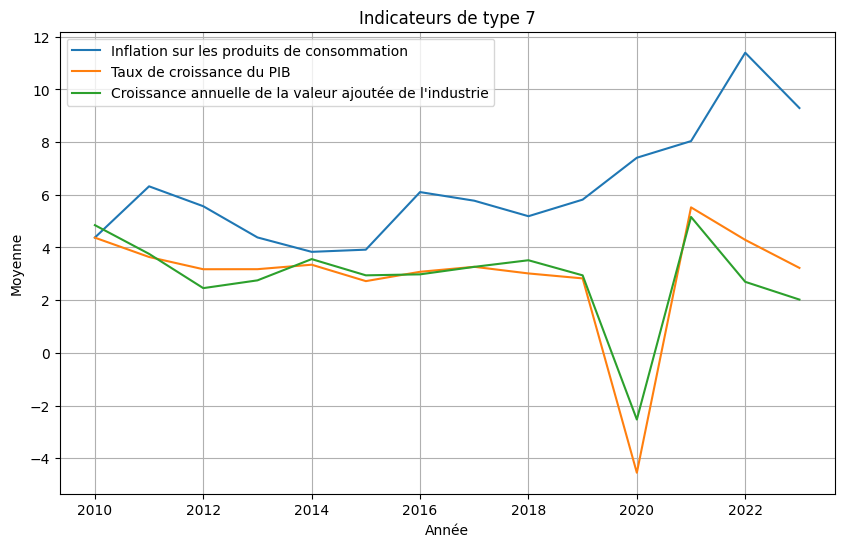

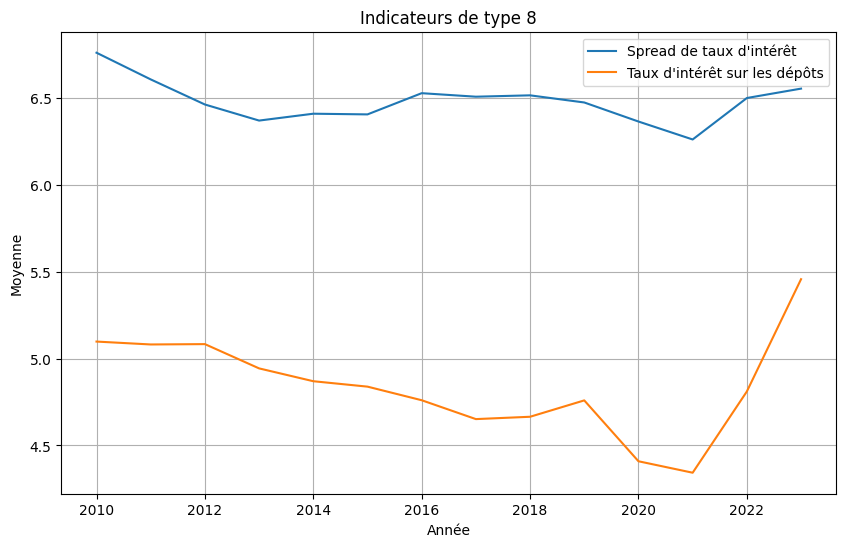

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Traçons un graphe par type d'indicateur : 

data_pivot["Year"] = pd.to_numeric(data_pivot["Year"], errors="coerce")

# Supprimer les lignes où 'Year' est NaN
data_pivot = data_pivot.dropna(subset=["Year"])

# Vérifier que 'Year' est de type numérique et une colonne valide
if "Year" in data_pivot.columns and data_pivot["Year"].ndim == 1:
    print("La colonne 'Year' est valide et prête pour le regroupement.")
else:
    raise ValueError("La colonne 'Year' est toujours problématique.")

# Sélectionner uniquement les colonnes numériques pour les indicateurs
numeric_columns = data_pivot.select_dtypes(include=["number"]).columns.difference(["Year"])
data_numeric = data_pivot[["Year"] + list(numeric_columns)]

# Calculer la moyenne des indicateurs par année
indicators_by_year = data_numeric.groupby("Year").mean()

for type_indicateur in range(1, 9):
    # Sélectionner les colonnes correspondant au type d'indicateur actuel
    indicateurs_type = [ind for ind, t in typologie_des_indicateurs.items() if t == type_indicateur]
    
    # Sélectionner les données correspondantes à ces indicateurs
    data_type = data_numeric[['Year'] + indicateurs_type]
    
    # Calculer la moyenne de chaque indicateur pour chaque année
    data_type_mean = data_type.groupby('Year').mean()
    
    # Créer le graphique
    plt.figure(figsize=(10, 6))
    for indicator in indicateurs_type:
        plt.plot(data_type_mean.index, data_type_mean[indicator], label=indicator)
    
    # Ajouter des labels et un titre
    plt.title(f'Indicateurs de type {type_indicateur}')
    plt.xlabel('Année')
    plt.ylabel('Moyenne')
    plt.legend()
    plt.grid(True)
    plt.show()

Attention, il s'agit ici de moyennes mondiales de l'évolution de chaque indicateur. \
Ces graphiques ne donnent qu'une idée de la tendance générale.

### **3.4. Regroupement par continent et visualisation**

On regroupe chacun des pays et chacune des régions par continent pour ensuite créer des graphiques de l'évolution des indicateurs par continent. 

In [16]:
# Dictionnaire manuel pour associer chaque région/pays à un continent
continent_mapping = {
    "Arab World": "Middle East and North Africa",
    "Africa Eastern and Southern": "Africa",
    "Africa Western and Central": "Africa",
    "World": "World",
    "North America": "North America",
    "South America": "South America",
    "Europe & Central Asia": "Europe and Central Asia",
    "East Asia & Pacific": "East Asia and Pacific",
    "Middle East & North Africa": "Middle East and North Africa",
    "Sub-Saharan Africa": "Africa",
    "South Asia": "South Asia",
}

# Ajouter une colonne "Continent" ou "Region" en fonction du dictionnaire
data_pivot["Region"] = data_pivot["Country Name"].map(continent_mapping)

# Vérifier les données après ajout
print("Aperçu des données avec la colonne 'Region' :")
print(data_pivot[["Country Name", "Region"]].drop_duplicates().head())


Aperçu des données avec la colonne 'Region' :
Indicator Name                                   Country Name  \
0                                                  Arab World   
14                                                      World   
28                East Asia & Pacific (excluding high income)   
42              Europe & Central Asia (excluding high income)   
56                                                 South Asia   

Indicator Name                        Region  
0               Middle East and North Africa  
14                                     World  
28                                       NaN  
42                                       NaN  
56                                South Asia  


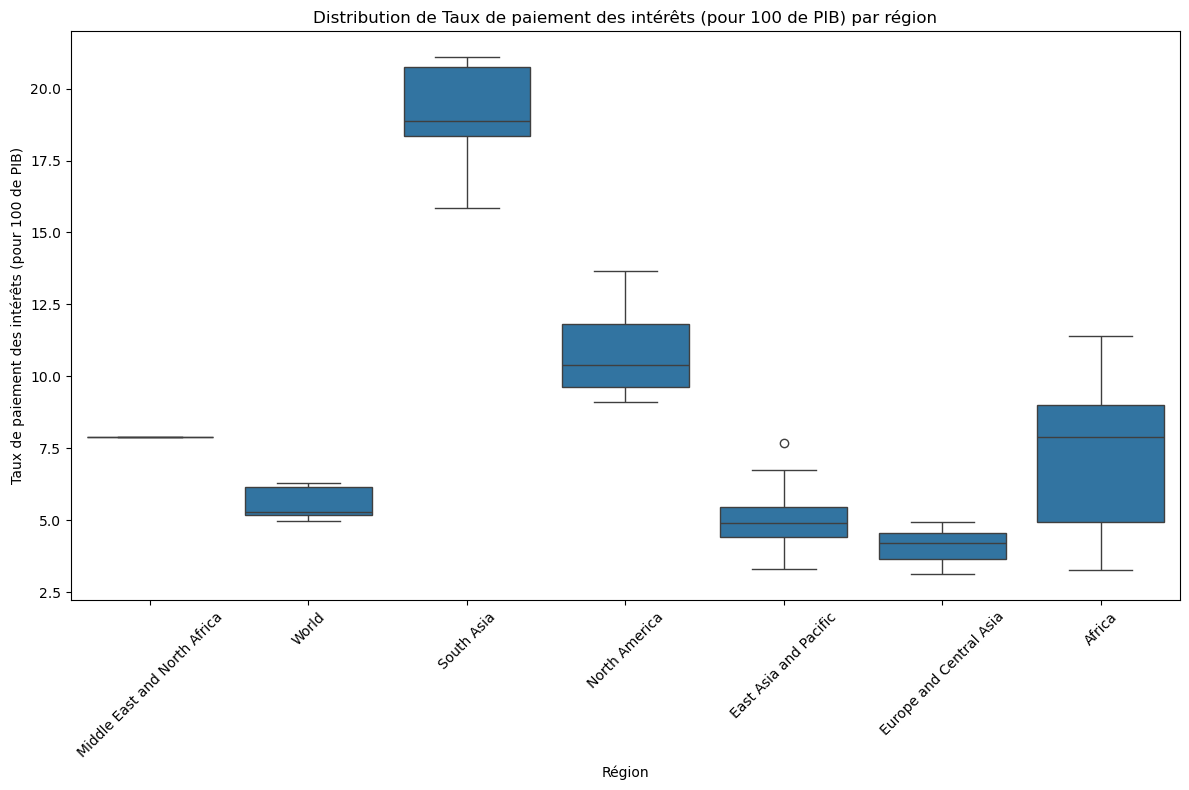

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple pour le taux d'alphabétisation chez les adultes avec une boîte à moustaches. 
# On utilisera par la suite des graphiques plus conventionnels
indicator_name = "Taux de paiement des intérêts (pour 100 de PIB)"

# Créer un boxplot pour l'indicateur par continent
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_pivot, x="Region", y=indicator_name)
plt.title(f"Distribution de {indicator_name} par région")
plt.xlabel("Région")
plt.ylabel(indicator_name)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Les données pour Middle East and North Africa se réduisent à un seul pays, d'où une variance nulle sur la boîte à moustaches. 

Nous allons maintenant représenter graphiquement l'évolution temporelle d'une sélection d'indicateurs parmi les 26.

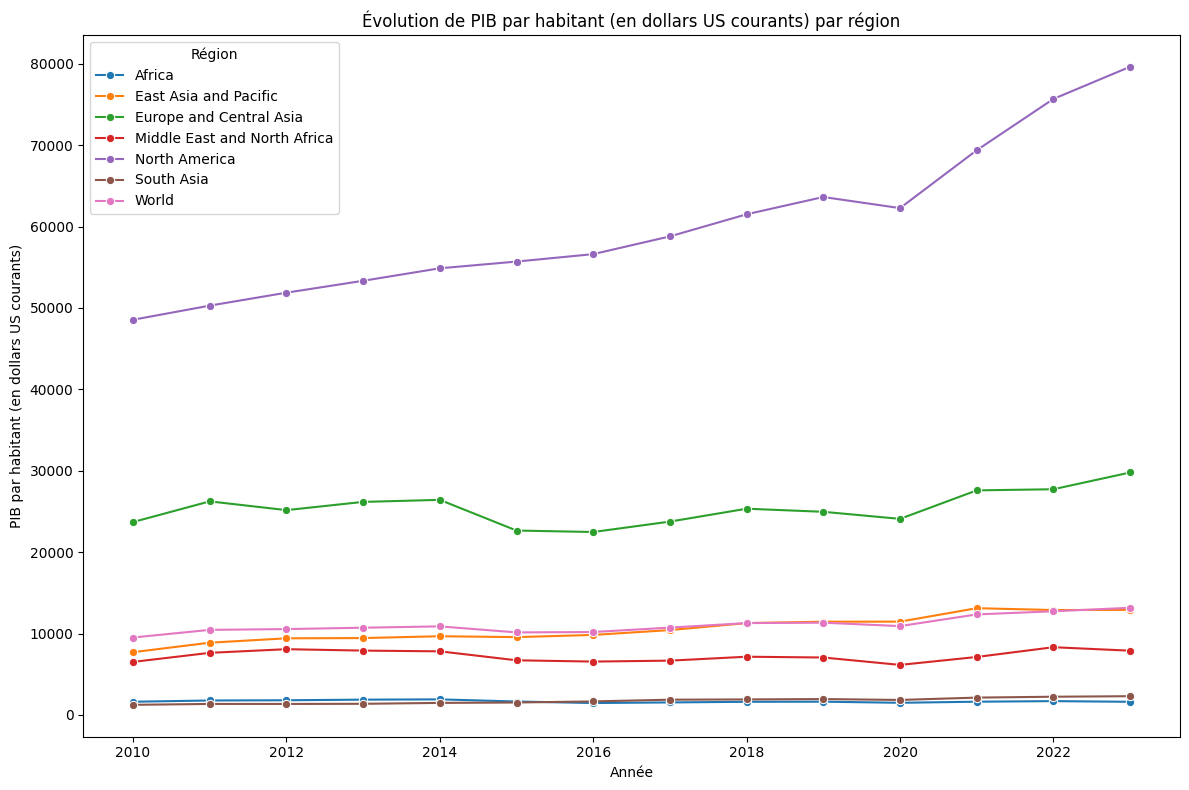

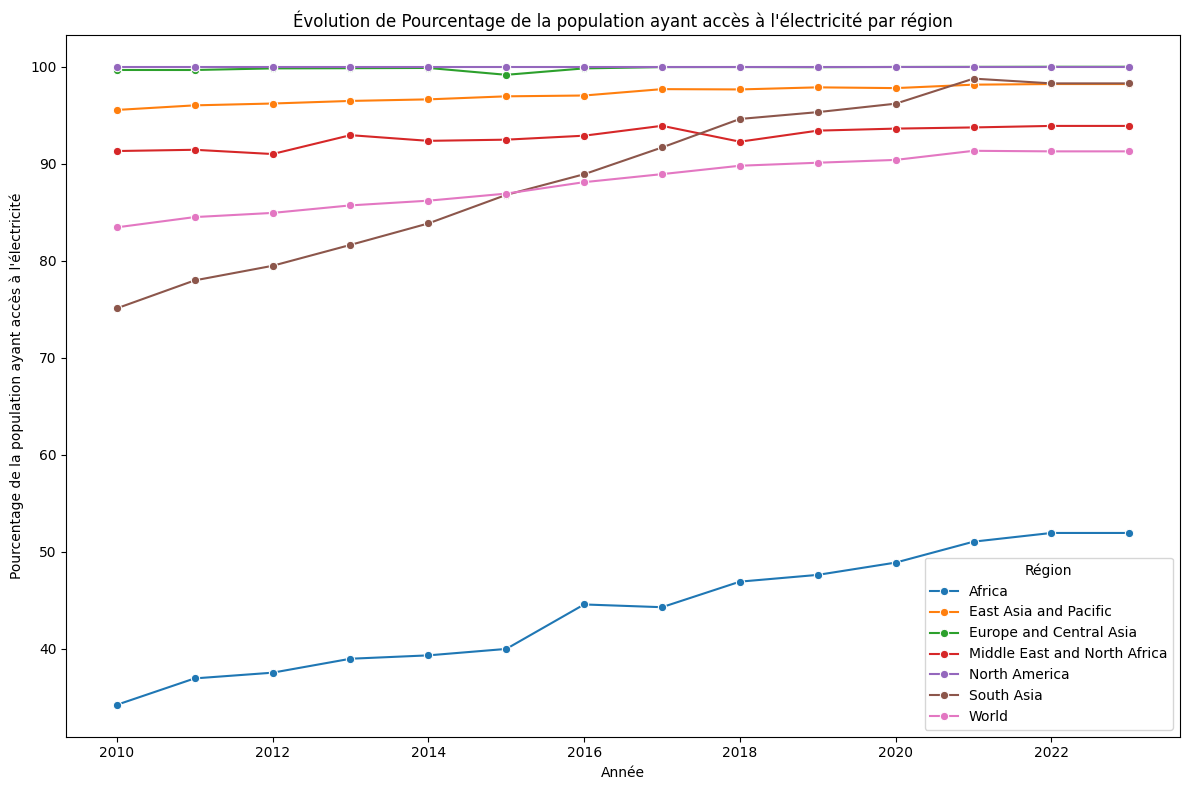

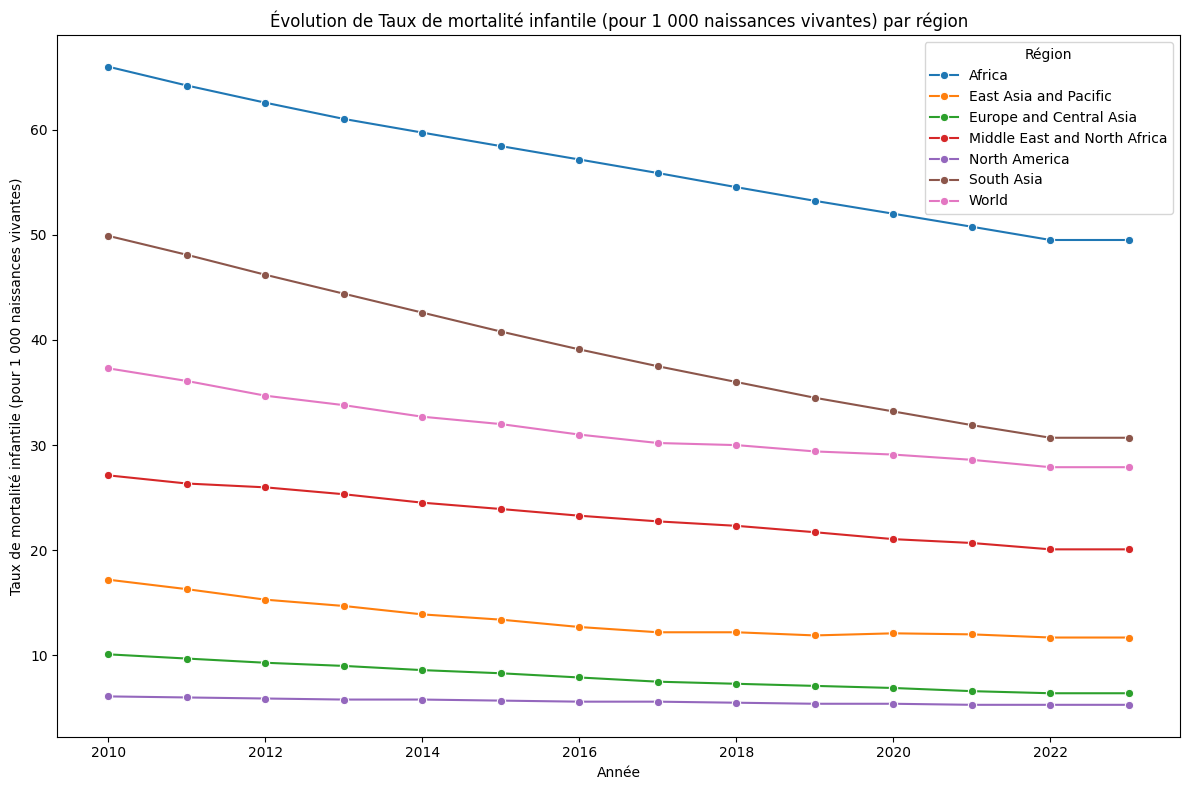

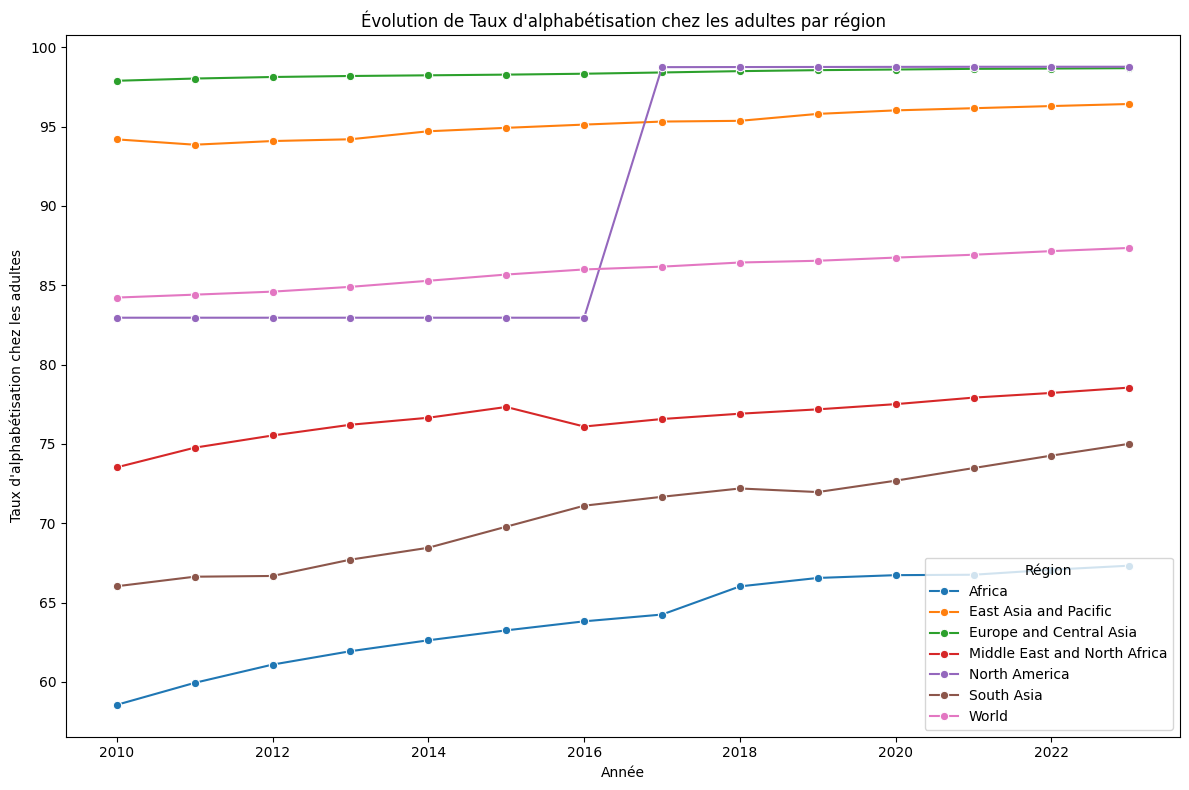

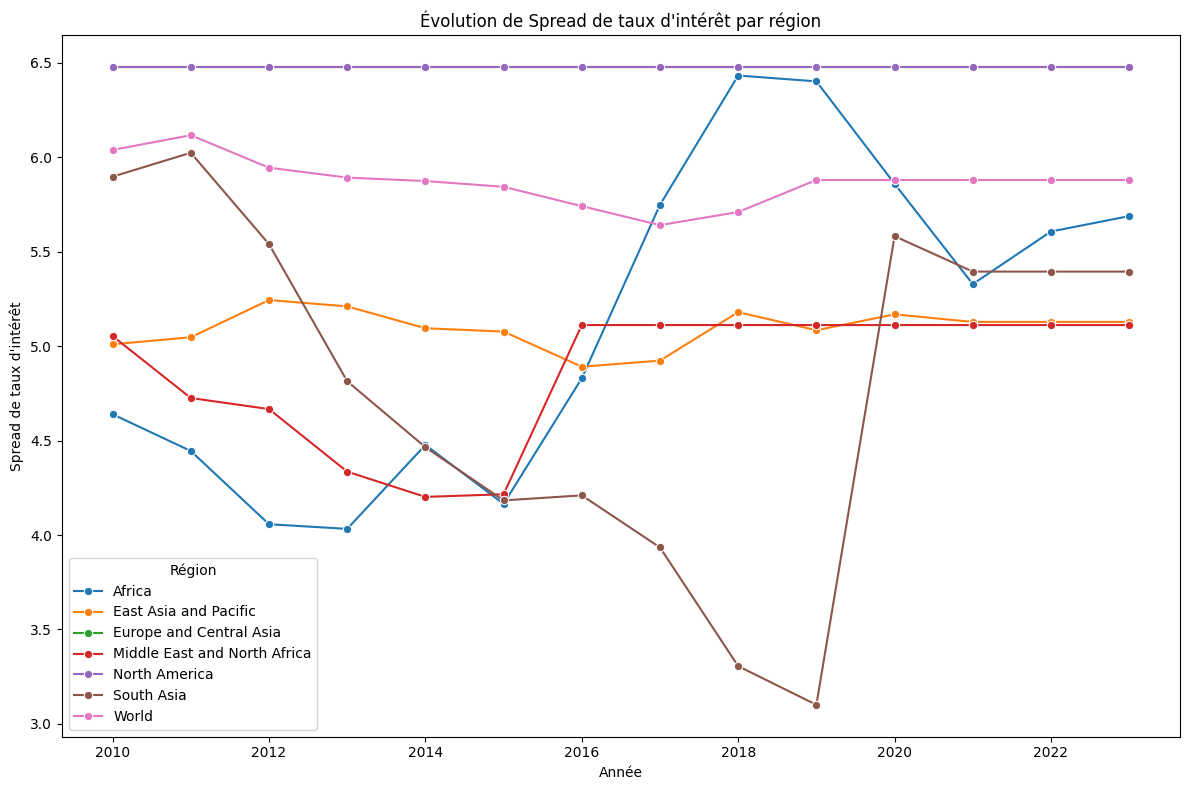

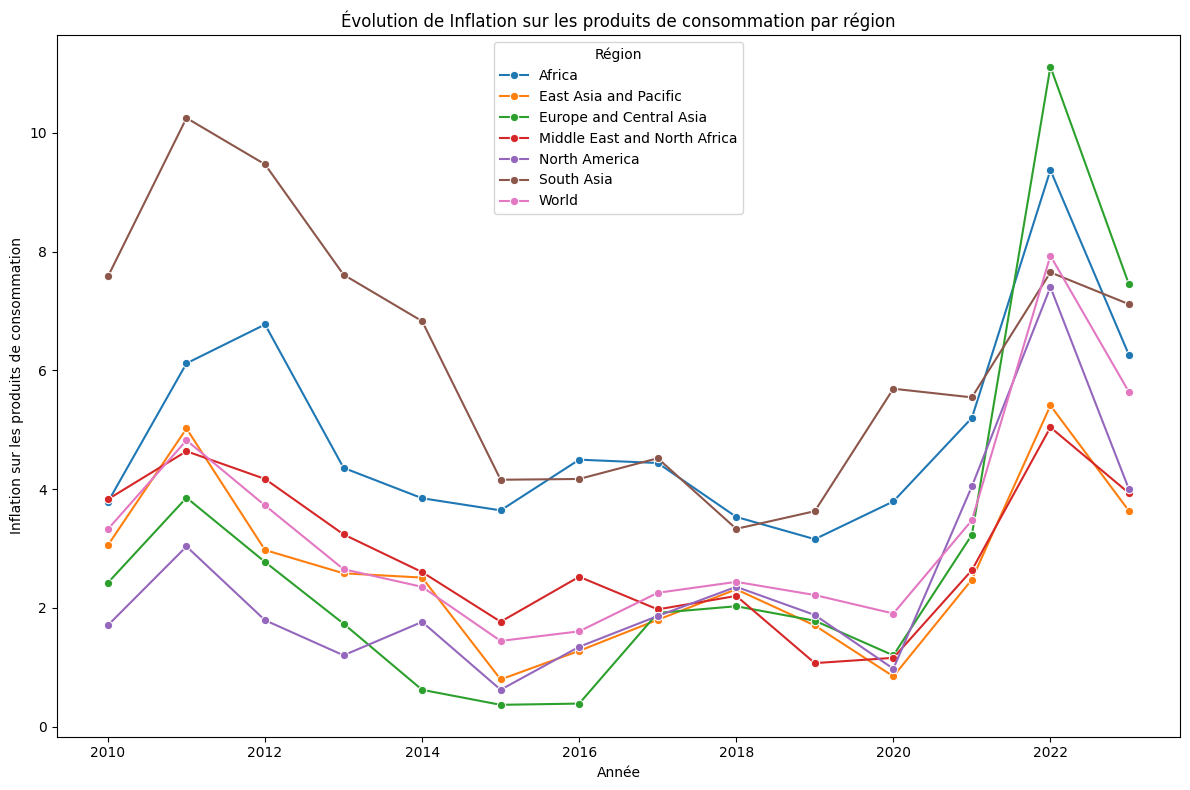

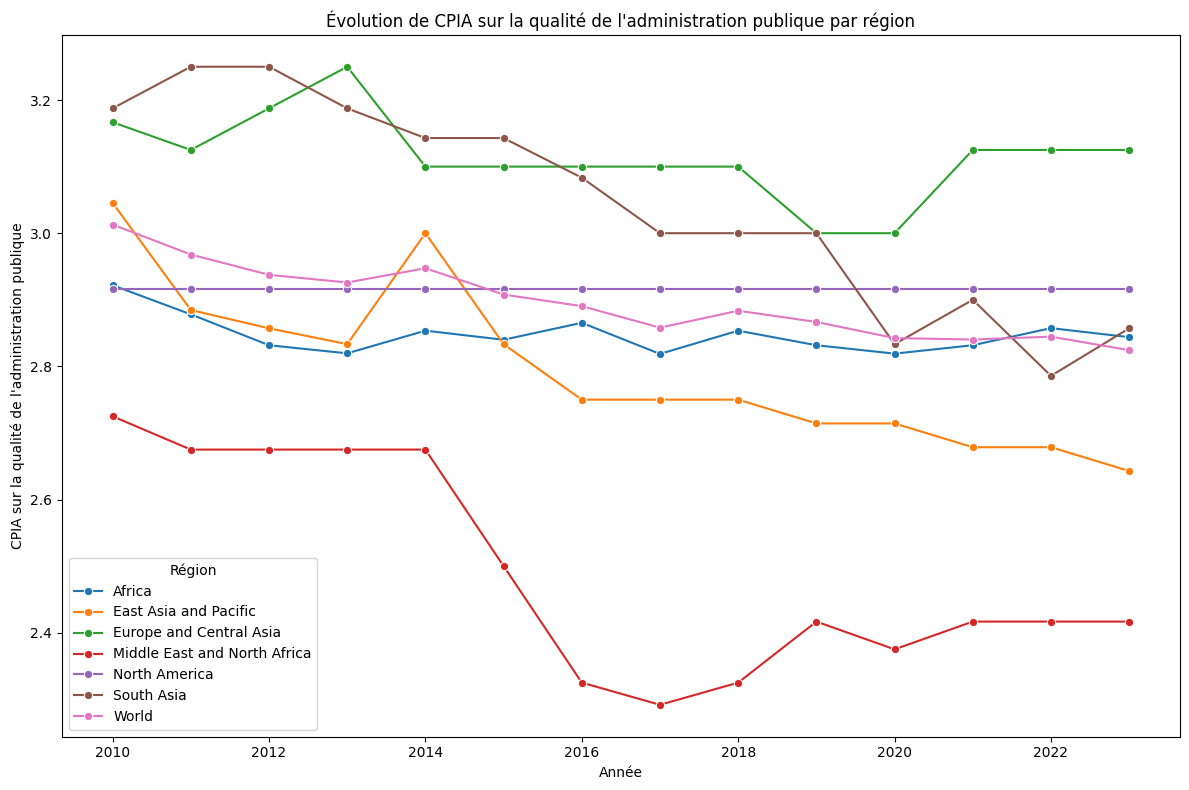

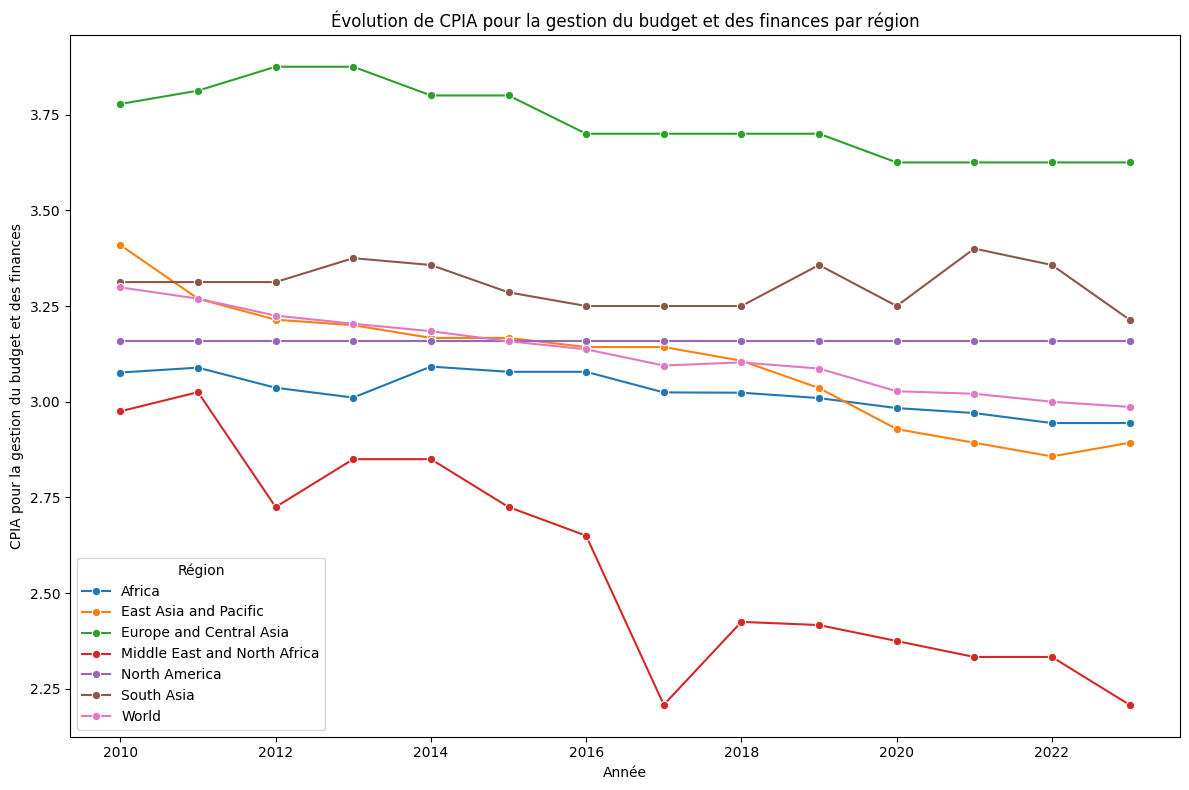

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les colonnes des indicateurs uniquement
indicator_columns = [
    "PIB par habitant (en dollars US courants)",
    "Pourcentage de la population ayant accès à l'électricité",
    "Taux de mortalité infantile (pour 1 000 naissances vivantes)",
    "Taux d'alphabétisation chez les adultes",
    "Spread de taux d'intérêt",
    "Inflation sur les produits de consommation",
    "CPIA sur la qualité de l'administration publique",
    "CPIA pour la gestion du budget et des finances"
]

# Boucler sur chaque indicateur pour tracer les tendances temporelles par région
for indicator_name in indicator_columns:
    # Calculer la moyenne par région et année pour l'indicateur
    indicator_by_region_year = data_pivot.groupby(["Region", "Year"])[indicator_name].mean().reset_index()
    
    # Tracer les tendances par région
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=indicator_by_region_year, x="Year", y=indicator_name, hue="Region", marker="o")
    plt.title(f"Évolution de {indicator_name} par région")
    plt.xlabel("Année")
    plt.ylabel(indicator_name)
    plt.legend(title="Région")
    plt.tight_layout()
    plt.show()


## **IV. Modélisation**

### **4.1. Prédiction par la méthode ACP**

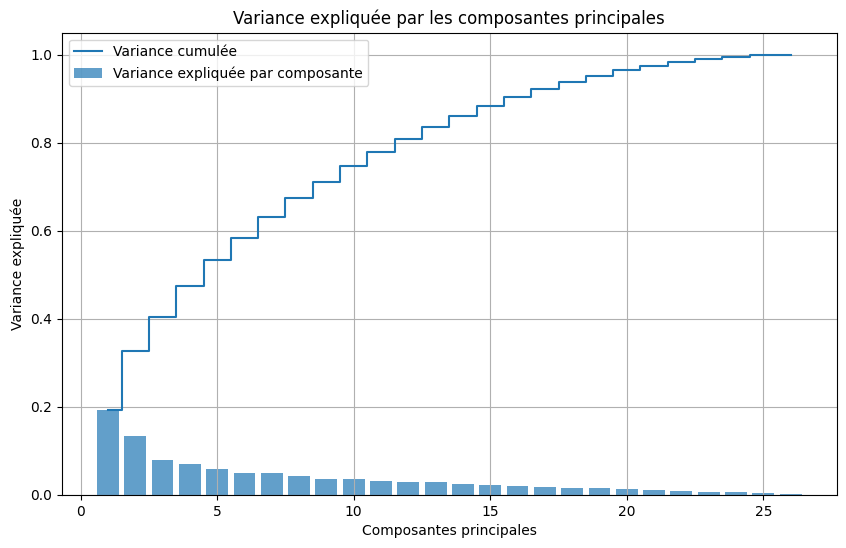

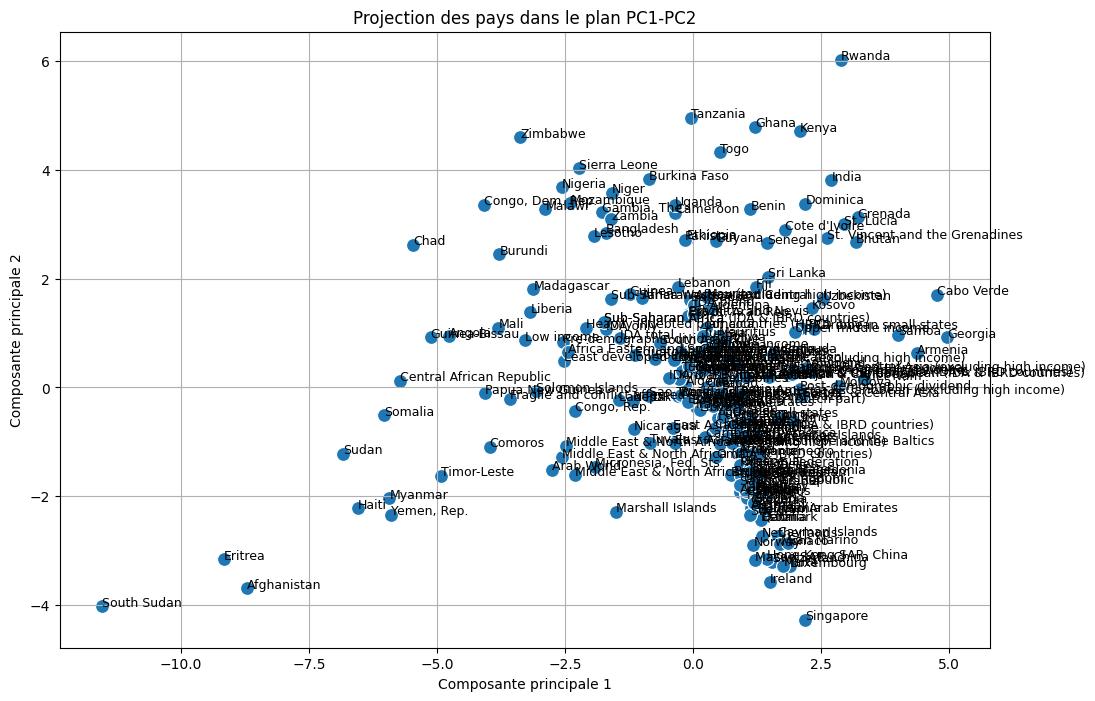

In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des indicateurs sélectionnés pour l'ACP
indicateurs_selectionnes = [
    "PIB par habitant (en dollars US courants)",
    "Pourcentage de la population ayant accès à l'électricité",
    "Taux de mortalité infantile (pour 1 000 naissances vivantes)",
    "Taux d'alphabétisation chez les adultes",
    "Inflation sur les produits de consommation",
    "Investissements nationaux dans les obligations",
    "CPIA pour les institutions et politiques environnementales",
    "Prime de risque sur les prêts",
    "Droits de douane sur les produits manufacturés",
    "Droits de douane sur les matières premières",
    "CPIA pour la gestion macroéconomique",
    "CPIA pour la gestion du budget et des finances",
    "CPIA sur la qualité de l'administration publique",
    "CPIA sur la protection sociale",
    "CPIA sur la transparence, responsabilité et corruption dans le secteur public",
    "Taux d'intérêt sur les dépôts",
    "Croissance annuelle des exportations de biens et services",
    "Croissance annuelle de la valeur ajoutée de l'industrie",
    "Épuisement des forêts, des sources d'énergie, des minéraux",
    "Épargne nationale nette",
    "Balance des paiements",
    "Exportation de biens et services pour 100 de PIB",
    "Entrées nettes d'IDE, pour 100 de PIB",
    "Sorties nettes d'IDE, pour 100 de PIB",
    "Spread de taux d'intérêt",
    "Taux de paiement des intérêts (pour 100 de PIB)"
]

# Filtrer les données pour l'année la plus récente
latest_year = data_pivot["Year"].max()
data_acp = data_pivot[data_pivot["Year"] == latest_year][indicateurs_selectionnes].dropna()

# Standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_acp)

# Réaliser l'ACP
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Expliquer la variance cumulée
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Afficher la variance expliquée par composante
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
        label='Variance expliquée par composante')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Variance cumulée')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.title('Variance expliquée par les composantes principales')
plt.legend(loc='best')
plt.grid()
plt.show()

# Résultat des composantes principales (premières dimensions)
pca_df = pd.DataFrame(pca_result[:, :2], columns=["PC1", "PC2"])
pca_df["Country Name"] = data_pivot[data_pivot["Year"] == latest_year]["Country Name"].values

# Visualiser les pays dans le plan PC1-PC2
plt.figure(figsize=(12, 8))
sns.scatterplot(x="PC1", y="PC2", data=pca_df, s=100)
for i, country in enumerate(pca_df["Country Name"]):
    plt.text(pca_df.loc[i, "PC1"], pca_df.loc[i, "PC2"], country, fontsize=9)
plt.title("Projection des pays dans le plan PC1-PC2")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid()
plt.show()


### **4.2. Prédiction par la méthode KNN**

<class 'pandas.core.frame.DataFrame'>
Index: 2956 entries, 2577 to 3174
Data columns (total 27 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Year                                                                           2956 non-null   int64  
 1   Balance des paiements                                                          2956 non-null   float64
 2   CPIA pour la gestion du budget et des finances                                 2956 non-null   float64
 3   CPIA pour la gestion macroéconomique                                           2956 non-null   float64
 4   CPIA pour les institutions et politiques environnementales                     2956 non-null   float64
 5   CPIA sur la protection sociale                                                 2956 non-null   float64
 6   CPIA sur la qualité de l'a

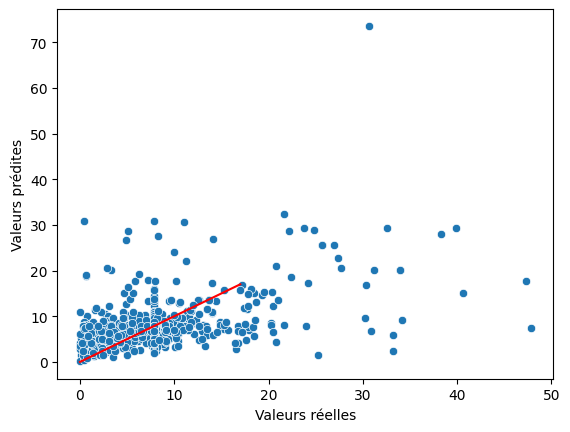

In [19]:
# Ségrégation des données
# Séparer la cible de prédiction (Y) des prédicteurs (X)
# Séparation du jeu de données en train et test pour les prédicteurs (X) 
# et la cible de prédiction (Y)

Y=data_pivot['Taux de paiement des intérêts (pour 100 de PIB)']

# Assigner la colonne/variable de la cible de prédiction à Y
# Assigner les prédicteurs à X en supprimant la colonne/variable cible
# Supprimer les colonnes avec des variables non numériques (Country code, Country name, Region, Year) et la colonne à prédire (Taux de paiement des intérêts (pour 100 de PIB))

# Supprimer ces colonnes

if 'Taux de paiement des intérêts (pour 100 de PIB)' in data_numeric.columns:
    X = data_numeric.drop('Taux de paiement des intérêts (pour 100 de PIB)', axis=1)
else:
    print("La colonne n'existe pas dans le DataFrame.")

# Séparation du jeu de données en train et test
# Nous utilisons la fonction du package sklearn pour diviser le jeu de données en jeu d'entraînement et jeu de test

from sklearn.model_selection import train_test_split

# test_size : si float, il doit être entre 0.0 et 1.0 et 
# représenter la proportion du jeu de données à inclure dans le jeu de test
# random_state : contrôle le mélange appliqué aux données avant de 
# faire la séparation

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
Xtrain.info()

# Nous utilisons simplement le régressseur KNN existant de sklearn
# Importation du régressseur KNN depuis le package sklearn

from sklearn.neighbors import KNeighborsRegressor

# Définir le modèle
# Nous devons décider du nombre de voisins (k)

KNN = KNeighborsRegressor(n_neighbors=3)

# Entraîner le modèle avec les données d'entraînement

KNN.fit(Xtrain, Ytrain)

# Évaluation du modèle
# Prédire sur le jeu de test donné le modèle entraîné

# Retourner les valeurs prédites pour les cas dans le jeu de test
Y_pred_KNN = KNN.predict(Xtest)
Y_pred_KNN


# Calcul du R2
r_squared = KNN.score(Xtest, Ytest)
print("R carré :", r_squared)

# Visualisation des prédictions vs. la vérité

import seaborn as sns

# Tracer un nuage de points entre les valeurs réelles et les notes prédites

fig = sns.scatterplot(x = Ytest, y = Y_pred_KNN)

# Réétiqueter la figure

fig.set(xlabel='Valeurs réelles', ylabel = 'Valeurs prédites')

# Ajouter une ligne diagonale représentant la prédiction parfaite

fig.plot([0, 17], [0, 17], '-r')



### **4.3. Prédiction MCO**

In [20]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Commençons par une régression Lasso :

# Supposons que data_numeric est déjà défini, avec 'Year' comme index
# On retire l'index 'Year' et on prépare les variables

X = data_numeric.drop(columns=['Year'])  # Les variables explicatives (toutes les colonnes sauf 'Year')
y = X['Taux de paiement des intérêts (pour 100 de PIB)']  # Par exemple, on prend 'Indicateur_1' comme variable cible (à remplacer par la cible souhaitée)
X = X.drop(columns=['Taux de paiement des intérêts (pour 100 de PIB)'])  # On retire la cible des variables explicatives

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de régression Lasso
lasso = Lasso(alpha=0.1)  # alpha est le paramètre de régularisation (à ajuster)

# Entraîner le modèle
lasso.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = lasso.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse}")

# Calculer le coefficient de détermination R^2
r2 = lasso.score(X_test, y_test)
print(f"Coefficient de détermination R^2 : {r2}")

# Afficher les coefficients de la régression Lasso
print("Coefficients de la régression Lasso :")
for feature, coef in zip(X.columns, lasso.coef_):
    print(f"{feature}: {coef}")

Erreur quadratique moyenne (MSE) : 31.557073828019995
Coefficient de détermination R^2 : 0.19716485086063285
Coefficients de la régression Lasso :
Balance des paiements: -0.010539875920106308
CPIA pour la gestion du budget et des finances: 0.0
CPIA pour la gestion macroéconomique: -1.235079981161464
CPIA pour les institutions et politiques environnementales: 0.0
CPIA sur la protection sociale: 0.0
CPIA sur la qualité de l'administration publique: 1.047934190041906
CPIA sur la transparence, responsabilité et corruption dans le secteur public: 0.0
Croissance annuelle de la valeur ajoutée de l'industrie: -0.018880065376704315
Croissance annuelle des exportations de biens et services: -0.00123539177631046
Droits de douane sur les matières premières: 0.05949573200127438
Droits de douane sur les produits manufacturés: -0.0022945415792598733
Entrées nettes d'IDE, pour 100 de PIB: -5.426704283826217e-05
Exportation de biens et services pour 100 de PIB: -0.023246361669108567
Inflation sur les p

In [22]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supposons que data_numeric est déjà défini, avec 'Year' comme index
# On retire l'index 'Year' et on prépare les variables
X = data_numeric.drop(columns=['Year'])  # Les variables explicatives (toutes les colonnes sauf 'Year')
y = X['PIB par habitant (en dollars US courants)']  # Par exemple, on prend 'Indicateur_1' comme variable cible (à remplacer par la cible souhaitée)
X = X.drop(columns=['PIB par habitant (en dollars US courants)'])  # On retire la cible des variables explicatives

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de régression Ridge
ridge = Ridge(alpha=1.0)  # alpha est le paramètre de régularisation (à ajuster)

# Entraîner le modèle
ridge.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = ridge.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse}")

# Calculer le coefficient de détermination R^2
r2 = ridge.score(X_test, y_test)
print(f"Coefficient de détermination R^2 : {r2}")

# Afficher les coefficients de la régression Ridge
print("Coefficients de la régression Ridge :")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f"{feature}: {coef}")

Erreur quadratique moyenne (MSE) : 376646154.81967556
Coefficient de détermination R^2 : 0.29931348436686656
Coefficients de la régression Ridge :
Balance des paiements: 243.06101007397373
CPIA pour la gestion du budget et des finances: -1739.4912809363761
CPIA pour la gestion macroéconomique: 2518.0932452332213
CPIA pour les institutions et politiques environnementales: 2913.4289332098565
CPIA sur la protection sociale: -2434.2767174912688
CPIA sur la qualité de l'administration publique: 403.4384941221074
CPIA sur la transparence, responsabilité et corruption dans le secteur public: -4488.247583191752
Croissance annuelle de la valeur ajoutée de l'industrie: 11.396686268372235
Croissance annuelle des exportations de biens et services: -8.677213988216957
Droits de douane sur les matières premières: 15.302336976849533
Droits de douane sur les produits manufacturés: -59.428419921243375
Entrées nettes d'IDE, pour 100 de PIB: -24.606850796268333
Exportation de biens et services pour 100 de

/Users/kevanjaber/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.07464e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


La régression Ridge donne un meilleur R2 que la régression Lasso (0,3 au lieu de 0,2). Elle est donc plus pertinente pour expliquer la variable cible. 

### **4.3. Prédiction par la méthode KMeans**

Aperçu des données avant traitement :
Indicator Name  PIB par habitant (en dollars US courants)  \
13                                            7292.210408   
27                                           13169.598225   
41                                            9900.613565   
55                                            8548.010378   
69                                            2303.302910   

Indicator Name  Pourcentage de la population ayant accès à l'électricité  \
13                                                      90.654518          
27                                                      91.277853          
41                                                      98.029657          
55                                                      99.991598          
69                                                      98.284156          

Indicator Name  Taux de mortalité infantile (pour 1 000 naissances vivantes)  \
13                                                      23

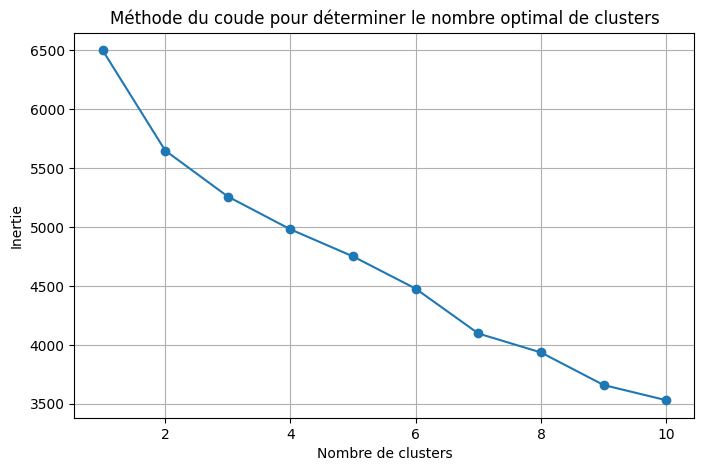

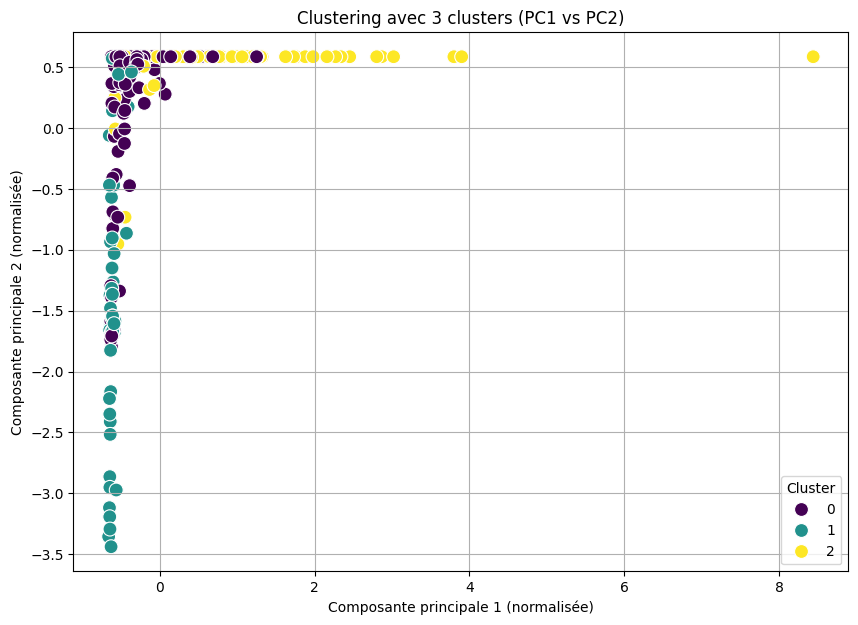

Résumé des clusters :
Indicator Name    Year  Balance des paiements  \
Cluster                                         
0               2023.0              -4.353839   
1               2023.0              -3.005557   
2               2023.0               3.193359   

Indicator Name  CPIA pour la gestion du budget et des finances  \
Cluster                                                          
0                                                     3.295235   
1                                                     2.567568   
2                                                     3.141436   

Indicator Name  CPIA pour la gestion macroéconomique  \
Cluster                                                
0                                           3.626994   
1                                           3.056945   
2                                           3.509592   

Indicator Name  CPIA pour les institutions et politiques environnementales  \
Cluster                                   

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Étape 1 : Préparation des données
# Inclure toutes les colonnes numériques mentionnées dans l'ACP
numeric_columns = [
    "PIB par habitant (en dollars US courants)",
    "Pourcentage de la population ayant accès à l'électricité",
    "Taux de mortalité infantile (pour 1 000 naissances vivantes)",
    "Taux d'alphabétisation chez les adultes",
    "Inflation sur les produits de consommation",
    "Investissements nationaux dans les obligations",
    "CPIA pour les institutions et politiques environnementales",
    "Prime de risque sur les prêts",
    "Droits de douane sur les produits manufacturés",
    "Droits de douane sur les matières premières",
    "CPIA pour la gestion macroéconomique",
    "CPIA pour la gestion du budget et des finances",
    "CPIA sur la qualité de l'administration publique",
    "CPIA sur la protection sociale",
    "CPIA sur la transparence, responsabilité et corruption dans le secteur public",
    "Taux d'intérêt sur les dépôts",
    "Croissance annuelle des exportations de biens et services",
    "Croissance annuelle de la valeur ajoutée de l'industrie",
    "Épuisement des forêts, des sources d'énergie, des minéraux",
    "Épargne nationale nette",
    "Balance des paiements",
    "Exportation de biens et services pour 100 de PIB",
    "Entrées nettes d'IDE, pour 100 de PIB",
    "Sorties nettes d'IDE, pour 100 de PIB",
    "Spread de taux d'intérêt",
    "Taux de paiement des intérêts (pour 100 de PIB)"
]

# Filtrer pour l'année la plus récente
latest_year = data_pivot["Year"].max()
data_clustering = data_pivot[data_pivot["Year"] == latest_year][numeric_columns]

# Vérifier les types et le contenu des colonnes
print("Aperçu des données avant traitement :")
print(data_clustering.head())
print(data_clustering.dtypes)

# Supprimer les lignes contenant des NaN
data_clustering = data_clustering.dropna()

# Standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# Étape 2 : Déterminer le nombre optimal de clusters (méthode du coude)
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Visualiser la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid()
plt.show()

# Étape 3 : Appliquer KMeans avec un nombre de clusters choisi (ex. k=3)
optimal_k = 3  # Modifiez ce nombre après avoir analysé la méthode du coude
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Ajouter les clusters aux données
data_clustering_with_clusters = data_pivot[data_pivot["Year"] == latest_year].copy()
data_clustering_with_clusters["Cluster"] = clusters

# Étape 4 : Visualisation des clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters, palette="viridis", s=100
)
plt.title(f"Clustering avec {optimal_k} clusters (PC1 vs PC2)")
plt.xlabel("Composante principale 1 (normalisée)")
plt.ylabel("Composante principale 2 (normalisée)")
plt.legend(title="Cluster")
plt.grid()
plt.show()

# Étape 5 : Afficher un résumé des clusters
# Sélectionner uniquement les colonnes numériques pour le résumé
numeric_summary_columns = data_clustering_with_clusters.select_dtypes(include=['float64', 'int64']).columns

# Ajouter la colonne Cluster pour le regroupement
cluster_summary_data = data_clustering_with_clusters[numeric_summary_columns].copy()
cluster_summary_data["Cluster"] = data_clustering_with_clusters["Cluster"]

# Grouper par cluster et calculer les moyennes
cluster_summary = cluster_summary_data.groupby("Cluster").mean()

# Afficher le résumé
print("Résumé des clusters :")
print(cluster_summary)

## **Conclusion**

Tout au long de ce projet, nous avons donc cherché à prédire le taux de paiement des intérêts en fonction de diverses variables de développement économique et humain. Ce projet nous a permis de découvrir certaines méthodes importantes de la data science, de la collecte des données à la modélisation statistique. Nous avons abordé plusieurs aspects essentiels de ce domaine : 

Récupération des données : Nous avons collecté les données de la banque mondiale, ce qui a impliqué la gestion d'une base de données complexe et massive. \
Nettoyage des données : La préparation des données a été une étape nécessaire afin de pouvoir effectuer ensuite un traitement efficace. Nous avons nettoyé, transformé et complété le tableau de données pour assurer une certaine qualité et cohérence avant d'analyser le tout. \
Visualisation des données : Nous avons produit de nombreuses statistiques descriptives et généré de nombreux graphiques afin de se faire une meilleure idée de l'évolution de nos indicateurs au cours du temps, pour mieux comprendre les tendances générales et par région. \
Modélisation et prédiction : Nous avons testé plusieurs modèles pour prédire le taux de paiement des intérêts, telles que les techniques KNN, K-means, et MCO Ridge et Lasso. De manière générale, nous ne sommes pas parvenus à obtenir un très bon R2 (30% pour la régression Ridge par exemple). Peut-être les indicateurs que nous avons choisis étaient-ils trop décorrélés de la variable cible, peut-être qu'une variable aussi complexe que le taux de paiement des intérêts aurait nécessité un plus grand nombre de régresseurs à prendre en compte afin d'effectuer une analyse prédictive plus fine. 

Si nous avions davantage de temps, plusieurs axes d'amélioration seraient possibles pour affiner notre modèle et enrichir notre analyse. Par exemple : 

Ajout de nouvelles variables : Enrichir notre analyse avec des données supplémentaires comme le niveau d'endettement des pays, les politique fiscales ou des indicateurs macroéconomiques supplémentaires. \
Analyse des facteurs externes : Appliquer des techniques de NLP pour analyser notamment des rapports financiers afin d'extraire des facteurs influençant les paiements des intérêts. \
Utilisation de modèles plus complexes : Essayer de prédire l'évolution de la variable cible en utilisant des outils des chaînes de Markov. 